<a href="https://colab.research.google.com/github/JPPedronr3/Artificial_Intelligence/blob/main/Machine_learning_atividade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.tree import DecisionTreeClassifier # DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB # Naive Bayes
from sklearn.model_selection import cross_val_score, cross_val_predict # CrossValidation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score # Confusion Matrix e F1_Score
from sklearn.svm import SVC # SVM
from sklearn.neural_network import MLPClassifier # MLP
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
import sklearn.model_selection as model_selection
# Desafio
from sklearn.linear_model import LogisticRegression

In [ ]:
# loading attribute names
att=pd.read_csv('glass-3.csv', index_col=-1, nrows=0).columns.tolist()
print(att)
# loading the data
dataset = np.loadtxt('glass-3.csv', delimiter=",", skiprows=1)
X = dataset[:,0:9]
y = dataset[:,9]
print(X.shape)

scaler = StandardScaler()
X = scaler.fit_transform(X)


n_folds = 5
labels = ['1','2','3','5','6','7']
# Mostrando o formato de X e y
print(X.shape)
print(y.shape)

label = np.unique(y)
print(label)

['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
(214, 9)
(214, 9)
(214,)
[1. 2. 3. 5. 6. 7.]


In [ ]:
def printa_matriz(y, ypred, labels):
    cm = confusion_matrix(y, ypred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    # Encontra a classe com mais erros
    erros_por_classe = cm.sum(axis=1) - cm.diagonal()
    classe_mais_erros = np.argmax(erros_por_classe)

    # Calcula precisão e recall para a classe com mais erros
    TP = cm[classe_mais_erros, classe_mais_erros]
    FP = cm[:, classe_mais_erros].sum() - TP
    FN = cm[classe_mais_erros, :].sum() - TP

    precisao = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0

    print(f"Precisão para a classe {labels[classe_mais_erros]}: {precisao:.2f}")
    print(f"Recall para a classe {labels[classe_mais_erros]}: {recall:.2f}")
    class_accuracy = cm.diagonal() / cm.sum(axis=1)
    for i, accuracy in enumerate(class_accuracy):
      print(f"Taxa de acerto para a classe {labels[i]}: {accuracy * 100:.2f}%")
    disp.plot()

def metricas(y, ypred, result):
  print("Taxa de acerto: ", result.mean() * 100)
  print('F1 score:', f1_score(y, ypred, average='macro'))

A) CONSTRUÇÃO CLASSIFICADOR: Encontrar a melhor solução para este
problema através da avaliação de soluções monolíticas (uso de um único classificador).
Para tal, avalie as técnicas estudas em sala (KNN, Naive Bayes, Árvores de Decisão,
SVM e MLP). Anote na tabela abaixo o melhor resultado encontrado para cada uma em
termos de taxa de acerto e f1_score. Utilize validação cruzada considerando 5 folds.

Taxa de acerto:  68.7264673311185
F1 score: 0.6547791970966843
Precisão para a classe 2.0: 0.68
Recall para a classe 2.0: 0.61
Taxa de acerto para a classe 1.0: 81.43%
Taxa de acerto para a classe 2.0: 60.53%
Taxa de acerto para a classe 3.0: 29.41%
Taxa de acerto para a classe 5.0: 61.54%
Taxa de acerto para a classe 6.0: 77.78%
Taxa de acerto para a classe 7.0: 82.76%


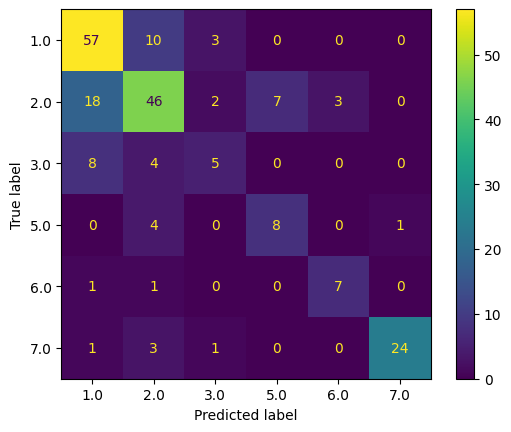

In [ ]:
#KNN
knn = KNeighborsClassifier(n_neighbors=3, algorithm="auto" , weights='distance',p=1,)
result = cross_val_score(knn, X, y, cv=5)
y_pred = cross_val_predict(knn, X, y, cv=5)
metricas(y, y_pred, result)
printa_matriz(y, y_pred, np.unique(y))

In [ ]:
# ARVORE
tree = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=10)
tree.fit(X, y)
result = cross_val_score(tree, X, y, cv=5)
y_pred = cross_val_predict(tree, X, y, cv=5)

# Obter importâncias dos atributos
importances = tree.feature_importances_

# Encontrar o índice do atributo mais importante
indice_mais_importante = importances.argmax()
nome_atributo_mais_importante = att[indice_mais_importante]  # Usar a lista de atributos

# Exibir resultados
print(f"Nome atributo: {nome_atributo_mais_importante}")
print(f"Índice: {indice_mais_importante}")

# Avaliação do modelo
metricas(y, y_pred, result)
printa_matriz(y, y_pred, np.unique(y))

In [ ]:
#NAIVE BAYES
nb = GaussianNB()
result = cross_val_score(nb, X, y, cv=5)
y_pred = cross_val_predict(nb, X, y, cv=5)
metricas(y, y_pred, result)
printa_matriz(y, y_pred, label)

In [ ]:
#SVM
svm = SVC(C=90, gamma=0.008, kernel='rbf')
result = cross_val_score(svm, X, y, cv=5)
y_pred = cross_val_predict(svm, X, y, cv=5)
metricas(y, y_pred, result)
printa_matriz(y, y_pred, label)


In [ ]:
#MLP
mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=10000)
result = cross_val_score(mlp, X, y, cv=5)
y_pred = cross_val_predict(mlp, X, y, cv=5)
metricas(y, y_pred, result)
printa_matriz(y, y_pred, label)

In [ ]:
  # Configurando os parâmetros para KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 10,14,16,20],    # Testar 3, 5, 7, 10 vizinhos
    'weights': ['uniform', 'distance'],  # Pesos uniformes ou por distância
    'p': [1, 2]  # Distância de Manhattan (p=1) ou Euclidiana (p=2)
}

# Criando o modelo KNN
knn = KNeighborsClassifier()

# GridSearchCV com KNN
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X, y)

# Melhores parâmetros para KNN
print("Melhores parâmetros para KNN:", grid_search_knn.best_params_)
print("Melhor F1 Score para KNN:", grid_search_knn.best_score_)

# Configurando os parâmetros para Decision Tree
param_grid_tree = {
    'criterion': ['gini', 'entropy'],  # Testar gini e entropy como critério
    'max_depth': [10, 20, None],       # Testar profundidade máxima
    'min_samples_split': [2, 10, 20]   # Testar diferentes min_samples_split
}

# Criando o modelo Decision Tree
tree = DecisionTreeClassifier()

# GridSearchCV com Decision Tree
grid_search_tree = GridSearchCV(tree, param_grid_tree, cv=5, scoring='accuracy')
grid_search_tree.fit(X, y)

# Melhores parâmetros para Decision Tree
print("Melhores parâmetros para Decision Tree:", grid_search_tree.best_params_)
print("Melhor F1 Score para Decision Tree:", grid_search_tree.best_score_)

#Svm parameters
parameters = [
   {'C': [1, 10, 100], 'gamma': ['scale', 0.001],
    'kernel': ['rbf', 'linear']},
]

# declarar o indutor SVM, MLP, KNN, DT, NB (GaussianNB)
clf = SVC(probability=True)

# GridSearch para customizar os parâmetros sobre base de validação
gs_Svm = GridSearchCV(clf, parameters, scoring = 'accuracy', cv=5, n_jobs=-1)
gs_Svm.fit(X, y)

print("Melhores parâmetros para SVM", gs_Svm.best_params_)
print("Melhor F1 Score para SVM", gs_Svm.best_score_)

#MLP
# Define the parameter grid for MLP
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],  # Test different hidden layer sizes
    'activation': ['relu', 'tanh'],  # Test different activation functions
    'solver': ['adam', 'sgd'],  # Test different solvers
    'max_iter': [400,500,600]  # Test different max iterations
}

# Create the MLP model
mlp = MLPClassifier()




In [ ]:
# Treinando o LDA
lda = LinearDiscriminantAnalysis(solver = "lsqr", )
result_lda = cross_val_score(lda, X, y, cv=5)
y_pred_lda = cross_val_predict(lda, X, y, cv=5)

metricas(y, y_pred_lda, result_lda)
printa_matriz(y, y_pred_lda, label)

In [ ]:
#Grid search Bagging
dt = DecisionTreeClassifier(criterion = 'entropy')

Bag_grid = BaggingClassifier()

grid_params = {
    'estimator': [dt],
    'n_estimators': [10,50,200],
    'max_samples' : [0.5, 0.8, 1.0],
    'random_state': [0]
}

grid_search_Bag = GridSearchCV(Bag_grid, grid_params, cv=5)
grid_search_Bag.fit(X, y)
bag_params = grid_search_Bag.best_params_

print(grid_search_Bag.best_params_)
print(grid_search_Bag.best_score_)


{'estimator': DecisionTreeClassifier(criterion='entropy'), 'max_samples': 0.8, 'n_estimators': 200, 'random_state': 0}
0.7106312292358803


Taxa de acerto:  71.06312292358803
F1 score: 0.708056886834476
Precisão para a classe 2: 0.66
Recall para a classe 2: 0.68
Taxa de acerto para a classe 1: 74.29%
Taxa de acerto para a classe 2: 68.42%
Taxa de acerto para a classe 3: 41.18%
Taxa de acerto para a classe 5: 69.23%
Taxa de acerto para a classe 6: 88.89%
Taxa de acerto para a classe 7: 82.76%


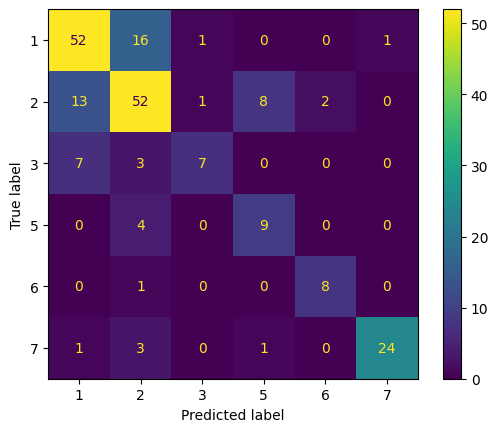

In [ ]:
#Bagging
Bag_clf = BaggingClassifier(estimator=DecisionTreeClassifier(criterion = 'entropy'), n_estimators=200, max_samples=0.8, random_state=0)

result = cross_val_score(Bag_clf, X, y, cv=n_folds)
ypred = cross_val_predict(Bag_clf, X, y, cv=n_folds)

metricas(y, ypred, result)
printa_matriz(y, ypred, np.unique(y))

In [ ]:
#Grid search randomForest
rf_grid = RandomForestClassifier()

grid_params = {
    'n_estimators': [10, 50, 100, 300],
    'max_samples' : [0.5,0.2,0.8],
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [5, 10, 15],
    'min_samples_split' : [2, 5],
    'random_state': [0]
}

grid_search_rf = GridSearchCV(rf_grid, grid_params, cv=3, n_jobs=-1, scoring='accuracy')
grid_search_rf.fit(X, y)
bag_params = grid_search_rf.best_params_

print(grid_search_rf.best_params_)
print(grid_search_rf.best_score_)


{'criterion': 'entropy', 'max_depth': 10, 'max_samples': 0.8, 'min_samples_split': 2, 'n_estimators': 300, 'random_state': 0}
0.7055946791862285


Taxa de acerto:  69.18050941306755
F1 score: 0.6529220925772651
Precisão para a classe 2: 0.62
Recall para a classe 2: 0.66
Taxa de acerto para a classe 1: 78.57%
Taxa de acerto para a classe 2: 65.79%
Taxa de acerto para a classe 3: 23.53%
Taxa de acerto para a classe 5: 53.85%
Taxa de acerto para a classe 6: 77.78%
Taxa de acerto para a classe 7: 86.21%


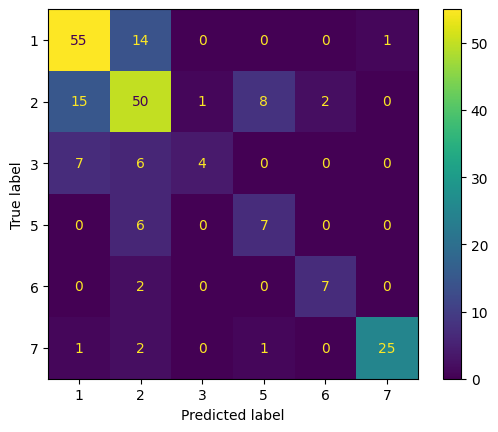

In [ ]:
#Random forest

rf_clf = RandomForestClassifier(criterion='entropy', max_depth= 10, max_samples= 0.8, min_samples_split= 2, n_estimators= 300, random_state= 0)

result = cross_val_score(rf_clf, X, y, cv=n_folds)
ypred = cross_val_predict(rf_clf, X, y, cv=n_folds)

metricas(y, ypred, result)
printa_matriz(y, ypred, np.unique(y))

In [ ]:
# Definir o modelo base e o AdaBoost
base_estimator = DecisionTreeClassifier()
ada_grid = AdaBoostClassifier(estimator=base_estimator)

grid_params_ada = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.5, 1],
    'estimator__max_depth': [1, 2, 3, 5]
}

grid_search_ada = GridSearchCV(ada_grid, grid_params_ada, cv=3, n_jobs=-1, scoring='accuracy')
grid_search_ada.fit(X, y)
ada_params = grid_search_ada.best_params_

print(grid_search_ada.best_params_)
print(grid_search_ada.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


{'estimator__max_depth': 5, 'learning_rate': 1, 'n_estimators': 200}
0.6917057902973397


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

Taxa de acerto:  66.83277962347731
F1 score: 0.606290410631728
Precisão para a classe 2: 0.60
Recall para a classe 2: 0.72
Taxa de acerto para a classe 1: 71.43%
Taxa de acerto para a classe 2: 72.37%
Taxa de acerto para a classe 3: 17.65%
Taxa de acerto para a classe 5: 38.46%
Taxa de acerto para a classe 6: 66.67%
Taxa de acerto para a classe 7: 79.31%


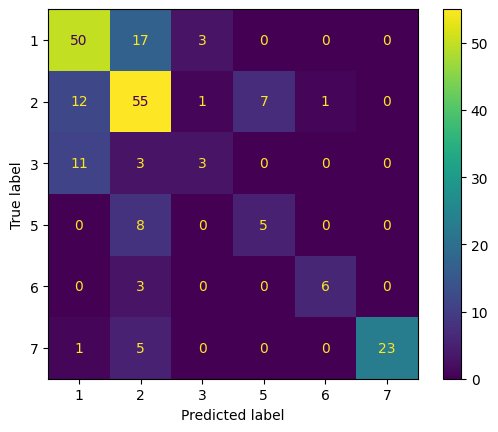

In [ ]:
#ada
ada_clf = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth= 5),n_estimators= 200, learning_rate = 1)
result = cross_val_score(ada_clf, X, y, cv=n_folds)
ypred = cross_val_predict(ada_clf, X, y, cv=n_folds)

metricas(y, ypred, result)
printa_matriz(y, ypred, np.unique(y))

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Ajustar os rótulos para começar de zero
le = LabelEncoder()
y_transformed = le.fit_transform(y)  # Isso vai mapear [1, 2, 3, 5, 6, 7] para [0, 1, 2, 3, 4, 5]

# Definir o modelo XGBoost com o número de classes ajustado
xgb_grid = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', objective='multi:softmax', num_class=len(le.classes_))

# Definir os hiperparâmetros que serão testados
grid_params_xgb = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2, 0.5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'random_state': [0]
}

# Configurar o GridSearchCV
grid_search_xgb = GridSearchCV(xgb_grid, grid_params_xgb, cv=3, n_jobs=-1, scoring='accuracy')

# Realizar o Grid Search
grid_search_xgb.fit(X, y_transformed)
xgb_params = grid_search_xgb.best_params_

print(grid_search_xgb.best_params_)
print(grid_search_xgb.best_score_)

# Se necessário, converter as previsões de volta aos rótulos originais
# y_pred = le.inverse_transform(grid_search_xgb.predict(X_test))

{'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'random_state': 0, 'subsample': 0.6}
0.7008998435054773


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [22:47:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Taxa de acerto:  67.33111849390919
F1 score: 0.6065291368895492
Precisão para a classe 2: 0.61
Recall para a classe 2: 0.70
Taxa de acerto para a classe 1: 72.86%
Taxa de acerto para a classe 2: 69.74%
Taxa de acerto para a classe 3: 5.88%
Taxa de acerto para a classe 5: 30.77%
Taxa de acerto para a classe 6: 100.00%
Taxa de acerto para a classe 7: 89.66%


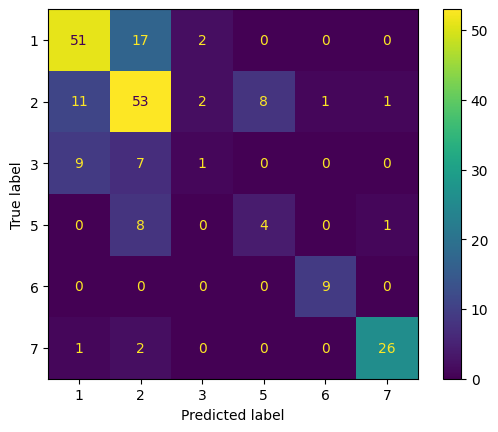

In [ ]:
#xgb

xgb_clf = XGBClassifier(colsample_bytree= 0.6, learning_rate= 0.1, max_depth= 3, n_estimators= 50, random_state= 0, subsample= 0.6)
result = cross_val_score(xgb_clf, X, y_transformed , cv=n_folds)
ypred = cross_val_predict(xgb_clf, X, y_transformed , cv=n_folds)

metricas(y_transformed , ypred, result)
printa_matriz(y_transformed, ypred, np.unique(y))